## Code for Ai algorithm project

### Production optimization

#### 1. Problem description

- Subject of the probem : to maximize the number of biscuits produced in the same dough.
* constraints : 
    - the roll of dough has a fixed size
    - the roll can have defects that partially usable. Their size is variable, as well as their number and position on the roll.
    - each biscuit is not limited in number in the roll
    - each biscuit has a specific size, value, and a maximum number of defects it can contain

* solution criteria : 
    - be at integer positions, so no half biscuit
    - no overlapping
    - reduce the maximum number of defect in dough as much as possible
    - do not exceed the maximum length of the roll
    - maximize the number of biscuits produced, as well as the value of the biscuits produced

* Benchmark : 
    - length = 500 units
    - set of defects : a, b and c
    - set of biscuits : 
        - biscuit 0 : len = 4, value = 6, max_defect = {a: 4, b: 2, c: 3}
        - biscuit 1 : len = 8, value = 12, max_defect = {a: 5, b: 4, c: 4}
        - biscuit 2 : len = 2, value = 1, max_defect = {a: 1, b: 2, c: 1}
        - biscuit 3 : len = 5, value = 8, max_defect = {a: 2, b: 3, c: 2}

#### Solution 1. using ortools

In [275]:
import ortools
from ortools.sat.python import cp_model

1. Problem description

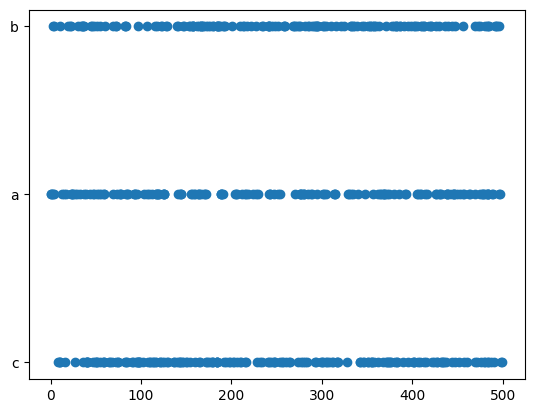

In [277]:
# importation of the defects
import pandas as pd
import matplotlib.pyplot as plt
defects = pd.read_csv("defects.csv", sep = ',')
plt.scatter(defects['x'], defects['class'])


In [292]:
# we define the problem and its variables
problem = cp_model.CpModel()

# we define the variables
# -1 : no biscuit, 0 to 3 : biscuit of type 0 to 3
environnment  = [[problem.NewBoolVar(f"biscuit_no_{i}_pos_{j}")for i in range(-1,4)] for j in range(500)]
print(environnment)
# we define the constraints

# constraint 1 : the total length of the biscuit must be lower than 500 units
# Note : already integrated by only limiting the env at the beginning

# constraint 2 : no biscuit should overlapp in the dough
# Note : already integrated by only limiting the env at the beginning

# constraint 3 : the biscuit criteria must be respected
for i in range(500):
    for j in range(1,4):
        if i+j < 500:  # Add this condition to prevent index out of range
            problem.Add(environnment[i+j][0] == 1).OnlyEnforceIf(environnment[i][1])
for i in range(500):
    for j in range(1,8):
        if i+j < 500:  # Add this condition to prevent index out of range
            problem.Add(environnment[i+j][0] == 1).OnlyEnforceIf(environnment[i][2])
for i in range(500):
    for j in range(1,2):
        if i+j < 500:  # Add this condition to prevent index out of range
            problem.Add(environnment[i+j][0] == 1).OnlyEnforceIf(environnment[i][3])
for i in range(500):
    for j in range(1,5):
        if i+j < 500:  # Add this condition to prevent index out of range
            problem.Add(environnment[i+j][0] == 1).OnlyEnforceIf(environnment[i][4])

# constraint 4 : biscuit can not be placed on the same position
for i in range(500):
   problem.Add(sum(environnment[i]) <= 1)
    


[[biscuit_no_-1_pos_0(0..1), biscuit_no_0_pos_0(0..1), biscuit_no_1_pos_0(0..1), biscuit_no_2_pos_0(0..1), biscuit_no_3_pos_0(0..1)], [biscuit_no_-1_pos_1(0..1), biscuit_no_0_pos_1(0..1), biscuit_no_1_pos_1(0..1), biscuit_no_2_pos_1(0..1), biscuit_no_3_pos_1(0..1)], [biscuit_no_-1_pos_2(0..1), biscuit_no_0_pos_2(0..1), biscuit_no_1_pos_2(0..1), biscuit_no_2_pos_2(0..1), biscuit_no_3_pos_2(0..1)], [biscuit_no_-1_pos_3(0..1), biscuit_no_0_pos_3(0..1), biscuit_no_1_pos_3(0..1), biscuit_no_2_pos_3(0..1), biscuit_no_3_pos_3(0..1)], [biscuit_no_-1_pos_4(0..1), biscuit_no_0_pos_4(0..1), biscuit_no_1_pos_4(0..1), biscuit_no_2_pos_4(0..1), biscuit_no_3_pos_4(0..1)], [biscuit_no_-1_pos_5(0..1), biscuit_no_0_pos_5(0..1), biscuit_no_1_pos_5(0..1), biscuit_no_2_pos_5(0..1), biscuit_no_3_pos_5(0..1)], [biscuit_no_-1_pos_6(0..1), biscuit_no_0_pos_6(0..1), biscuit_no_1_pos_6(0..1), biscuit_no_2_pos_6(0..1), biscuit_no_3_pos_6(0..1)], [biscuit_no_-1_pos_7(0..1), biscuit_no_0_pos_7(0..1), biscuit_no_1_p

In [310]:
import math

# constraint 5 : the sum of defect should not be higher than what is defined in the problem
# for biscuit 0
def count_defects(env, biscuit_type, defect_type):
    counter =0
    biscuit_type += 1
    for defect in defects[defects["class"] == defect_type].iterrows():
        x = defect[1]["x"]
        x_min = math.floor(x)
        x_max = math.ceil(x) if x<499 else 499
        if biscuit_type == 1:
            if x_min -2 >= 0 :
                counter += sum(env[x_min-2:x_max][1])
            else :
                counter += sum(env[0:x_max+1][1])
        elif biscuit_type == 2:
            if x_min - 6 >= 0 :
                counter += sum(env[x_min-6:x_max][2])
            else :
                counter += sum(env[0:x_max+1][2])
        elif biscuit_type == 3:
            counter += env[x_min][3]
        elif biscuit_type == 4:
            if x_min - 3 >= 0 :
                counter += sum(env[x_min-3:x_max][4])
            else :
                counter += sum(env[0:x_max+1][4])
    return counter 

problem.Add(count_defects(environnment, 0, "a") <= 4)
problem.Add(count_defects(environnment, 0, "b") <= 2)
problem.Add(count_defects(environnment, 0, "c") <= 3)
problem.Add(count_defects(environnment, 1, "a") <= 5)
problem.Add(count_defects(environnment, 1, "b") <= 4)
problem.Add(count_defects(environnment, 1, "c") <= 1)
problem.Add(count_defects(environnment, 2, "a") <= 1)
problem.Add(count_defects(environnment, 2, "b") <= 2)
problem.Add(count_defects(environnment, 2, "c") <= 1)
problem.Add(count_defects(environnment, 3, "a") <= 2)
problem.Add(count_defects(environnment, 3, "b") <= 3)
problem.Add(count_defects(environnment, 3, "c") <= 2)


IndexError: list index out of range

In [294]:
equation = sum([1 for x in defects[defects["class"] == "a"].iterrows() if environnment[math.floor(x[1]["x"])][1] and environnment[math.ceil(x[1]["x"])][1] ])
print(equation)

NotImplementedError: Evaluating a LinearExpr instance as a Boolean is not implemented.

In [295]:
# what we want to maximize
# goal : have the best value

def value(env):
    value = 0
    for i in range(500):
            value += 6*env[i][1] + 12*env[i][2] + 1*env[i][3] + 8*env[i][4]
    return value

problem.Maximize((value(environnment)))


In [296]:
# solve the problem
solver = cp_model.CpSolver()
status = solver.Solve(problem)
if status == cp_model.OPTIMAL:
    print("optimal solution found")

optimal solution found


In [297]:
# visualize the solution

# print the maximum value
print(solver.ObjectiveValue())

709.0


In [298]:
# visualize the solution
solution = []
for i in range(500):
    for j in range(5):
        if solver.Value(environnment[i][j]) == 1:
            solution.append([i, j])
print(solution)

[[0, 1], [1, 0], [2, 0], [3, 0], [5, 2], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 4], [14, 0], [15, 0], [16, 0], [17, 0], [18, 2], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [28, 1], [29, 0], [30, 0], [31, 0], [32, 2], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [43, 2], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [53, 1], [54, 0], [55, 0], [56, 0], [57, 4], [58, 0], [59, 0], [60, 0], [61, 0], [62, 4], [63, 0], [64, 0], [65, 0], [66, 0], [67, 1], [68, 0], [69, 0], [70, 0], [71, 4], [72, 0], [73, 0], [74, 0], [75, 0], [76, 1], [77, 0], [78, 0], [79, 0], [80, 2], [81, 0], [82, 0], [83, 0], [84, 0], [85, 0], [86, 0], [87, 0], [88, 4], [89, 0], [90, 0], [91, 0], [92, 0], [93, 2], [94, 0], [95, 0], [96, 0], [97, 0], [98, 0], [99, 0], [100, 0], [101, 4], [102, 0], [103, 0], [104, 0], [105, 0], [106, 2], [107, 0], [108, 0], [109, 0], [110, 0], [111, 0], [112, 0], [113, 0], [115, 1], [116, 0], [117, 0], [118, 0], 